# Predicting Heart Disease Using Machine Learning

This notebook uses various machine learning models capable of predicting whether or not someone has a heart disease based on features related to Heart Disease


1. Problem Definition
2. Data we will use
3. Evaluation
4. Features 
5. Modelling
6. Experimentation


# 1. Problem Definition

Given clinical parameters about a patient, we need to predict whether they have a heart disease or not

# 2. Data

We have taken the data from UCI Machine Learning Repository
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

# 3. Evaluation

We are planning to reach atleast 95 % of accuracy with the data set that we have. This is some kind of Proof of concept



# 4. Features


## Preparing the tools
* Pandas
* Matplotlib
* Numpy


In [1]:
# Import all the tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Lib to evaluate the model

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve



In [2]:
## Load Data

In [3]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

In [4]:
## Data exploration {Exploratory Data Analysis}

* Kind of data and how we treat them
* what is missing from the data
* outliers we have
* how can you add, remove the data we have

In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

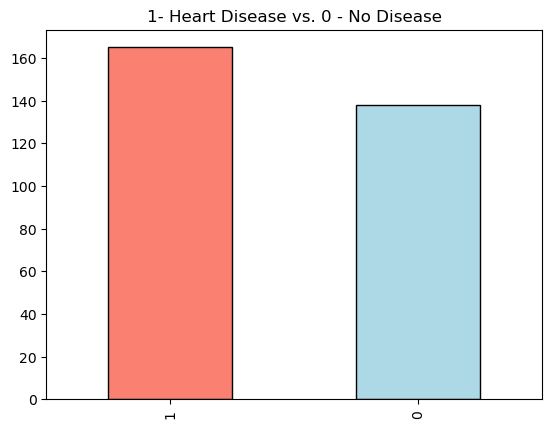

In [6]:
df["target"].value_counts().plot(title="1- Heart Disease vs. 0 - No Disease",
                                 kind="bar", 
                                 color=["salmon", "lightblue"],
                                edgecolor="black");

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing values 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# Compare two columns against one another

In [11]:
# Finding patterns:

### Heart Disease Frequency according to Sex

In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
# Compare the target column with Sex column

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


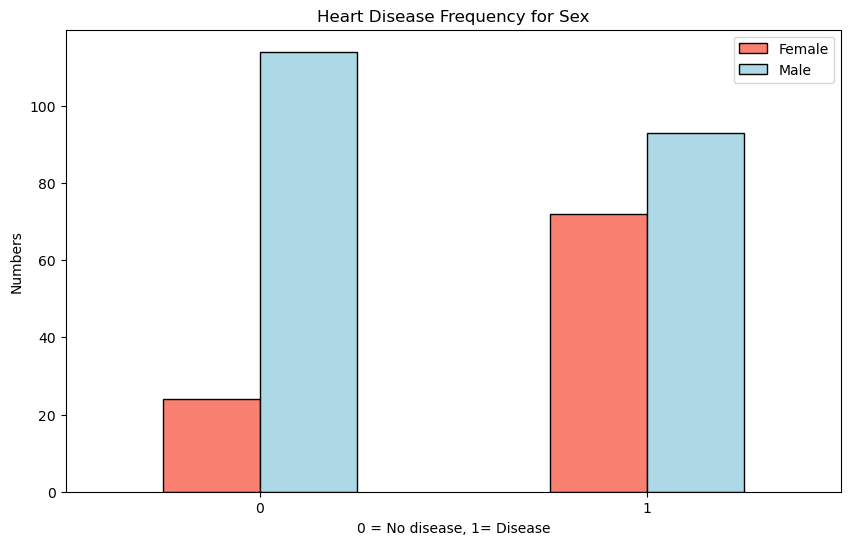

In [14]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"],
                                   edgecolor="black")
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No disease, 1= Disease")
plt.ylabel("Numbers")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [15]:
# Compare Age with Target
pd.crosstab(df.age, df.target)

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7


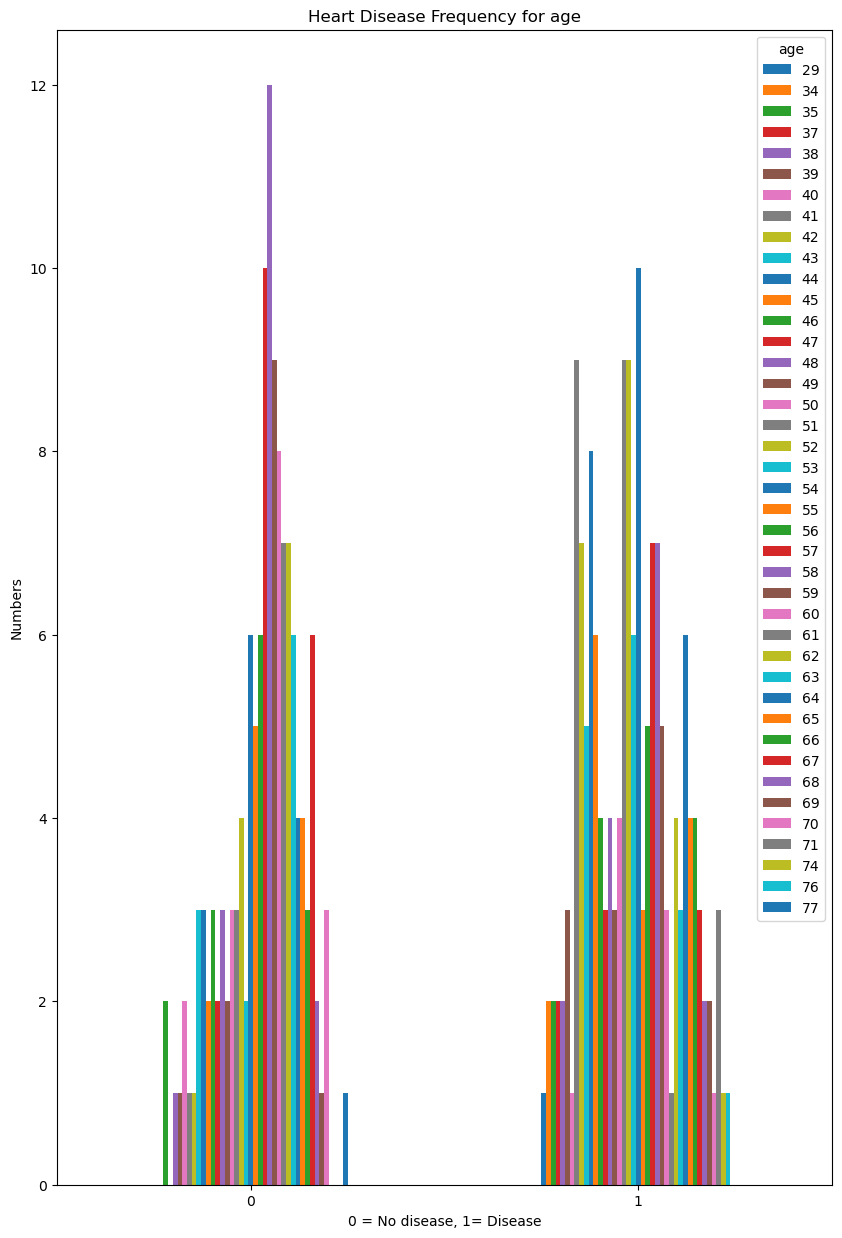

In [16]:
pd.crosstab(df.target, df.age).plot(kind="bar",
                                   figsize=(10,15));

plt.title("Heart Disease Frequency for age")
plt.xlabel("0 = No disease, 1= Disease")
plt.ylabel("Numbers");
plt.xticks(rotation=0);

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

# Age vs Max Heart for Heart Disease

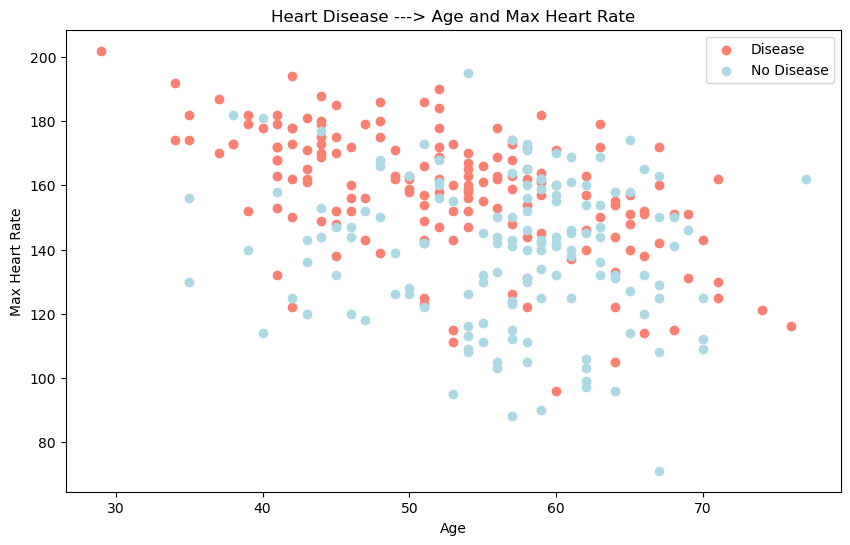

In [19]:
# create another figure

plt.figure(figsize=(10,6))

#scatter with positive examples

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
            c="salmon");

# scatter with neagtive examples

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
            c="lightblue");

plt.title("Heart Disease ---> Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [20]:
# Check the distribution of the age column with the histogram

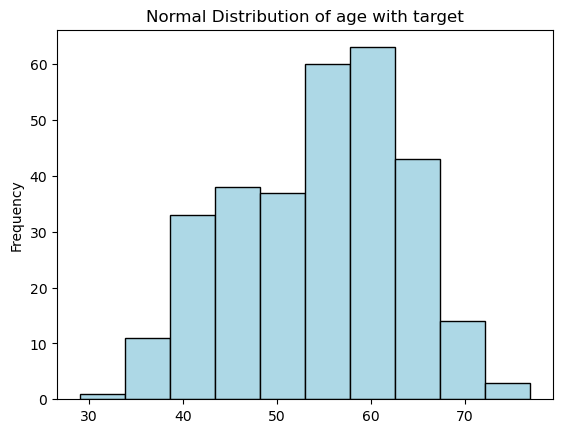

In [21]:
df.age.plot.hist(title= "Normal Distribution of age with target",color="lightblue", edgecolor="black");

In [22]:
## Distribution tells you the outliers in your data set


## Heart disease Frequency per Chest Pain type

In [23]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


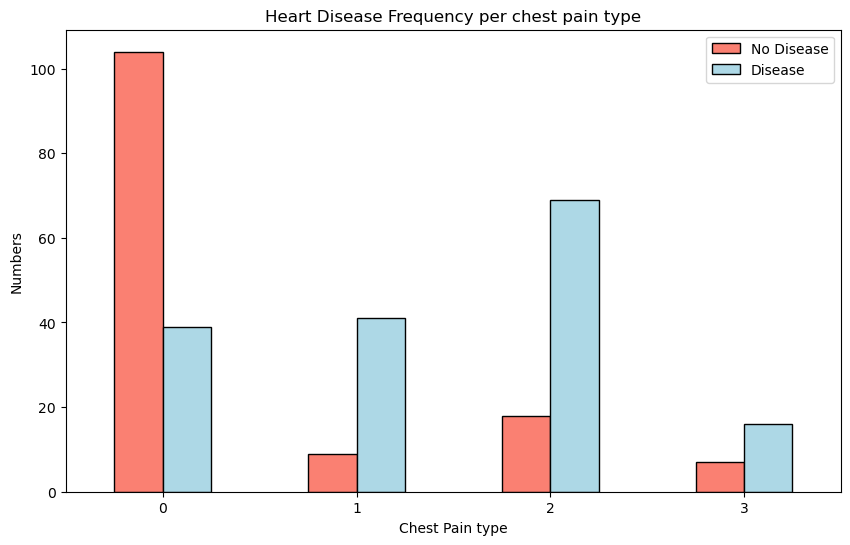

In [24]:
# Make the crosstab more visual

pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon", "lightblue"],
                                  edgecolor="black")
plt.title("Heart Disease Frequency per chest pain type")
plt.xlabel("Chest Pain type")
plt.ylabel("Numbers")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


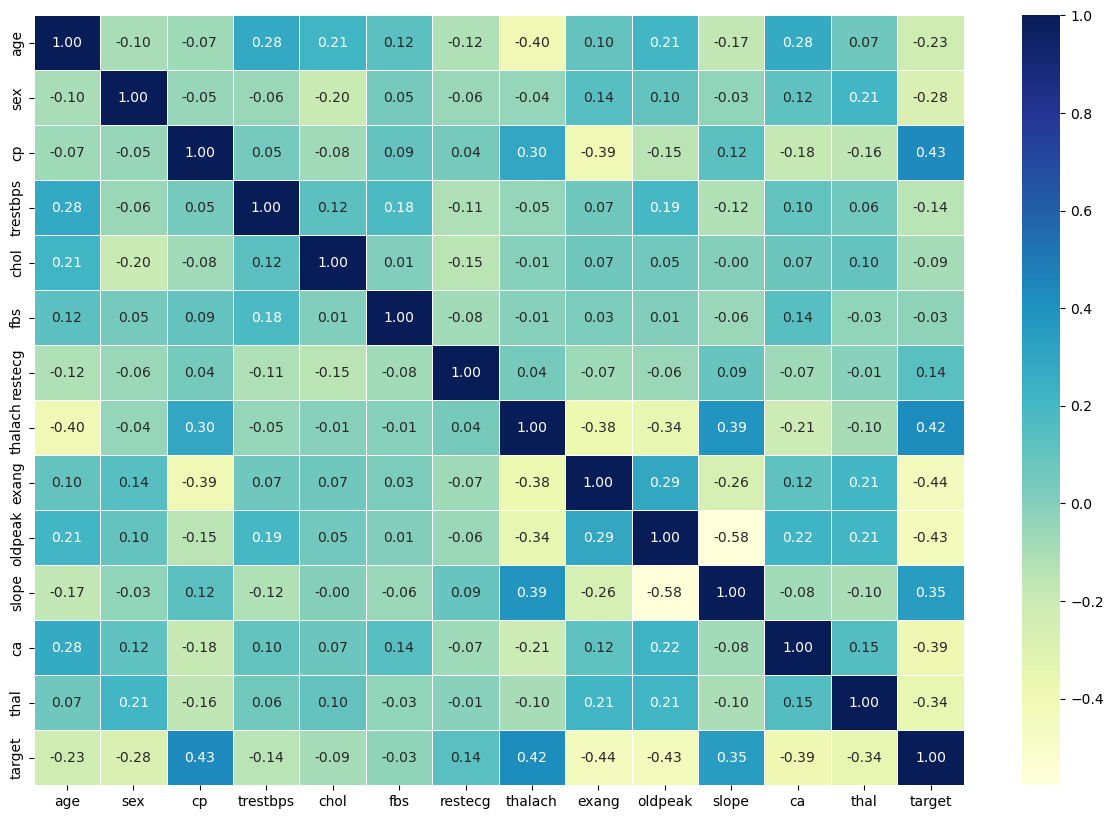

In [27]:
# Lets make our correlation matrix more visual

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax =  sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

### 5. Modelling

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
# Split data into X and Y
X = df.drop("target", axis=1)
Y = df["target"]

In [30]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [31]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [32]:
# Split data into test and train
np.random.seed(42)

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                   Y,
                                                   test_size=0.2)

In [33]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [34]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [35]:
Y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [36]:
Y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

# Build our Machine Learning Model
** Three models to try out
1. Logistic Regression
2. K-NN
3. RandomForestClassifier

In [37]:
# Create a dict for models

In [38]:
ml_models = {"Logistic Regression" : LogisticRegression(),
            "KNN" : KNeighborsClassifier(),
            "Random Forest" : RandomForestClassifier(),
            "Gradient Boost" : GradientBoostingClassifier()}

# create a function to git and score models

def fit_train_and_score_test(models, X_train, X_test, Y_train, Y_test):
    """
    Fits and Trains given machine learning models.
    models : The machine learning models we are planning to use
    X_train : Training data with no labels
    X_test : Testing data with no labels
    Y_train : training labels
    Y_test : Test labels
    """
    
    # set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    ml_models_scores ={}
    
    #Loop through models
    for name, model in ml_models.items():
        
        # Fit the model to the data
        model.fit(X_train, Y_train)
        #Evaluate the model and append its scores to model_scores
        ml_models_scores[name] = model.score(X_test, Y_test)
    return ml_models_scores


In [39]:
ml_models_scores = fit_train_and_score_test(ml_models, X_train, X_test, Y_train, Y_test)
ml_models_scores

/Users/skhand17/Desktop/ml-course/HeartDisease/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'Gradient Boost': 0.7704918032786885}

Logistic Regression : 88.52%
K-NearestNeighbors : 68.85%
RandomForestClassifier : 83.61%
GradientBoostClassifier : 77.05%


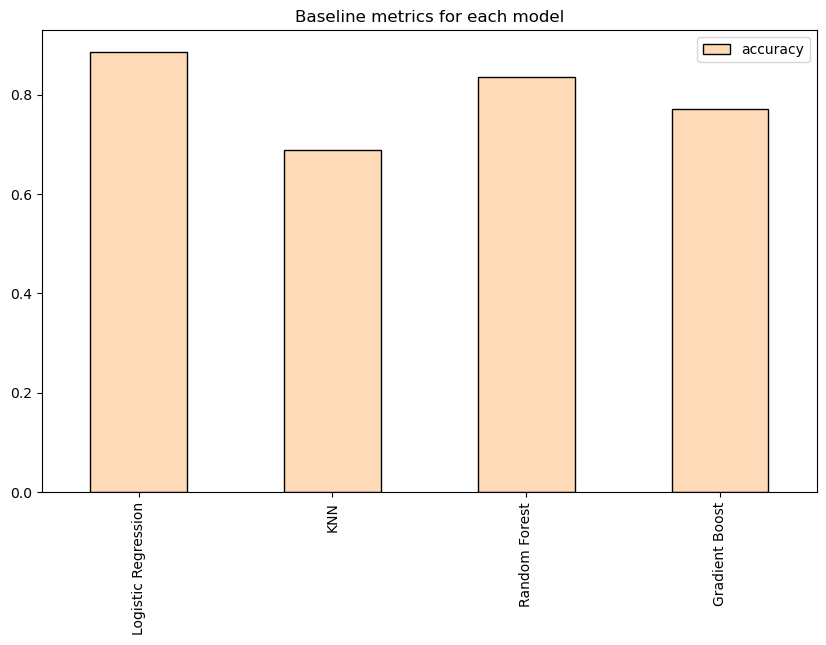

In [40]:
### Model Comparison
ml_models_compare = pd.DataFrame(ml_models_scores, index=["accuracy"])
ml_models_compare.T.plot.bar(title="Baseline metrics for each model",color="peachpuff", figsize=(10,6), edgecolor="black");

print(f"Logistic Regression : {(ml_models_scores['Logistic Regression']) * 100:.2f}%")
print(f"K-NearestNeighbors : {(ml_models_scores['KNN']) * 100:.2f}%")
print(f"RandomForestClassifier : {(ml_models_scores['Random Forest']) * 100:.2f}%")
print(f"GradientBoostClassifier : {(ml_models_scores['Gradient Boost']) * 100:.2f}%")

# We got a baseline model and our first predictions are always not the correct ones.

1. Lets look at the following things

* Hyperparameterds Tuning
* Feature importance
* Confusion matrix
* Cross validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve(AUC)




### Hyperparameter Tuning

In [41]:
train_scores = []
test_scores = []


# Create a list of different n-neighbours
neighbours = range(1,21)
#Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbours

for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, Y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, Y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(X_test, Y_test))


In [42]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [43]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


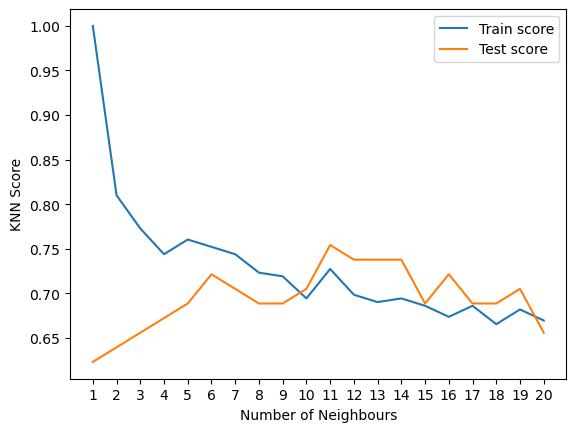

In [44]:
plt.plot(neighbours, train_scores, label="Train score")
plt.plot(neighbours, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbours")
plt.ylabel("KNN Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores) *100:.2f}%");

### Hyperparameter tuning with RandomizedSearchCV

In [45]:
# Let's tune logistic regression model and RandomForestClassifier()

In [46]:
# Create a hyperparameter grid for `Logisitic Regression()`

In [47]:

log_reg_grid = {"C" : np.logspace(-4, 4, 20),
               "solver" : ["liblinear"]}

# Create a hyperparameter grid for Random Forest Classifier()

rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
          "max_depth" : [None, 3 ,5, 10],
          "min_samples_split" : np.arange(2, 20, 2),
          "min_samples_leaf" : np.arange(1, 20, 2)}

# Creating a hyperparameter grid for Gradient Boost Classifier ()
gb_grid = {"n_estimators" : np.arange(10, 50, 10),
          "max_depth" : range(1, 16, 2),
          "learning_rate" : np.arange(0.1, 1, 0.1),
          "random_state": np.arange(0, 10, 1)}




In [48]:
# Our hyperparameters grid are setup for all the three models

In [49]:
# Tune Logisitic Regression

In [50]:
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression

rs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [51]:


rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [52]:
rs_log_reg.score(X_test, Y_test)

0.8852459016393442

In [53]:
# Tune RandomForestClassifier

In [54]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifer

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

rs_rf.fit(X_train, Y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [55]:
np.arange(0.1, 1, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [56]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [57]:
rs_rf.score(X_test, Y_test)

0.8688524590163934

In [58]:
# Tuning the Gradient boost classifier

np.random.seed(42)
gb_rs = RandomizedSearchCV(GradientBoostingClassifier(),
                          param_distributions=gb_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

gb_rs.fit(X_train, Y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=20,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_depth': range(1, 16, 2),
                                        'n_estimators': array([10, 20, 30, 40]),
                                        'random_state': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
                   verbose=True)

### Hyperparameter Tuning With GridSearchCV

In [59]:
gb_rs.score(X_test, Y_test)

0.8524590163934426

In [60]:
gb_rs.best_params_

{'random_state': 0, 'n_estimators': 20, 'max_depth': 1, 'learning_rate': 0.2}

In [61]:
# Different hyperparameters for Logistic Regression

In [62]:
log_reg_grid = {"C" : np.logspace(-4, 4, 30),
               "solver" : ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train, Y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [63]:
# check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [64]:
# Evalaute the Grid Search Logistic Regression model
gs_log_reg.score(X_test, Y_test)

0.8852459016393442

In [65]:
ml_models_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'Gradient Boost': 0.7704918032786885}

## Evaluating our tuned machine learning classifier , beyond accuracy

* ROC curve and AUC score
* Confusion maatrix
* Classification report
* Precision
* Recall
* F1-score

To make comparisions and evaluate our trained modelm first we need to make predictions

In [66]:
Y_preds = gs_log_reg.predict(X_test)

In [67]:
Y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [68]:
Y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [69]:
# Import ROC curve function

In [70]:
# Plot ROC curve and calculate AUC metrics

/Users/skhand17/Desktop/ml-course/HeartDisease/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


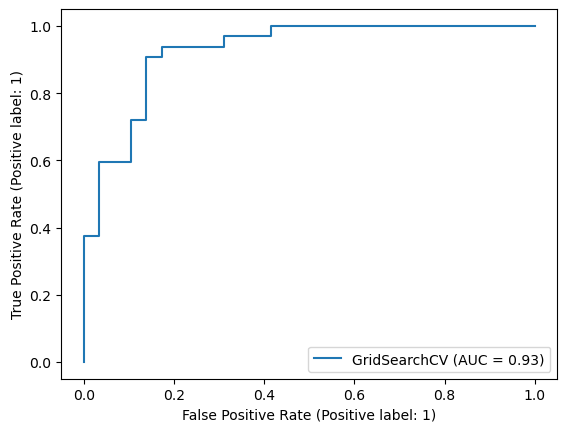

In [71]:
plot_roc_curve(gs_log_reg, X_test, Y_test);

In [72]:
# Confusion Matrix

In [73]:
print(confusion_matrix(Y_test, Y_preds))

[[25  4]
 [ 3 29]]


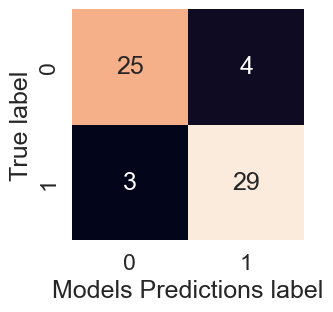

In [74]:
sns.set(font_scale=1.5)

def plot_conf_mat(Y_test, Y_preds):
    
    """
    Plot a nice looking confusion matrix using Seaborns heatmap()
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(Y_test, Y_preds),
                                      annot=True,
                                      cbar=False)
    
    plt.xlabel("Models Predictions label")
    plt.ylabel("True label")

plot_conf_mat(Y_test, Y_preds)

In [75]:
# Now we got ROC, An AUC metric and a confusion matrix.


In [76]:
# Let's get classification as well as cross-validation

In [77]:
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Cross Validation on metrics such as mentioned above

In [78]:
# Check best hyperparameters

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [79]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')


In [80]:
# Cross validated accuracy

cv_acc = cross_val_score(clf,
                        X,
                        Y,
                        cv=5,
                        scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [81]:
# Cross validated precision

cv_precision = cross_val_score(clf,
                        X,
                        Y,
                        cv=5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [82]:
# Cross validated recall
cv_recall = cross_val_score(clf,
                        X,
                        Y,
                        cv=5,
                        scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [83]:
# Cross validated F1
cv_f1 = cross_val_score(clf,
                        X,
                        Y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

In [84]:
# visualize cross validated metrics

Accuracy score : 84.80%
Precision score : 82.16%
Recall score : 92.73%
F1 score : 87.05%


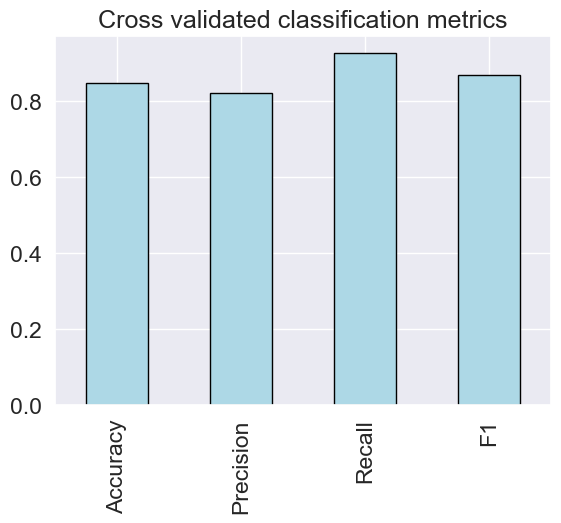

In [120]:
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                          "Precision" : cv_precision,
                          "Recall" : cv_recall,
                          "F1" : cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross validated metrics on Logisitic Regression",
                     legend=False, color="lightblue", edgecolor="black");

print(f"Accuracy score : {(cv_acc) * 100:.2f}%")
print(f"Precision score : {(cv_precision) * 100:.2f}%")
print(f"Recall score : {(cv_recall) * 100:.2f}%")
print(f"F1 score : {(cv_f1) * 100:.2f}%")

In [86]:
### GridSearch CV on RandomForestClassification :

random_forest_grid = {"n_estimators" : np.arange(10, 1000, 50),
          "max_depth" : [None, 3 ,5, 10]}

# Setup grid hyperparameter search for LogisticRegression

random_forest_grid_search = GridSearchCV(RandomForestClassifier(),
                         param_grid=random_forest_grid,
                         cv=5,
                         verbose=True)

random_forest_grid_search.fit(X_train, Y_train);







Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [90]:
random_forest_grid_search.best_params_








{'max_depth': 3, 'n_estimators': 210}

In [91]:
random_forest_grid_search.score(X_test, Y_test)

0.8688524590163934

In [93]:
#Instantiating random forest classifier with its best parameters

random_classifier = RandomForestClassifier(n_estimators=210,
                                          max_depth=3)


In [95]:
# cross validated accuracy

cv_acc_random_forest = cross_val_score(random_classifier,
                                      X,
                                      Y,
                                      cv=5,
                                      scoring="accuracy")
cv_acc_random_forest = np.mean(cv_acc_random_forest)
cv_acc_random_forest

0.8415300546448087

In [96]:
# cross validated precision
cv_precision_random_forest = cross_val_score(random_classifier,
                                      X,
                                      Y,
                                      cv=5,
                                      scoring="precision")
cv_precision_random_forest = np.mean(cv_precision_random_forest)
cv_precision_random_forest


0.83228354404825

In [97]:
# cross validated recall

cv_recall_random_forest = cross_val_score(random_classifier,
                                      X,
                                      Y,
                                      cv=5,
                                      scoring="recall")
cv_recall_random_forest = np.mean(cv_recall_random_forest)
cv_recall_random_forest

0.8909090909090909

In [98]:
# cross validated F1 score

cv_f1_random_forest = cross_val_score(random_classifier,
                                      X,
                                      Y,
                                      cv=5,
                                      scoring="f1")
cv_f1_random_forest = np.mean(cv_f1_random_forest)
cv_f1_random_forest


0.844413925743849

Accuracy score : 84.15%
Precision score : 83.23%
Recall score : 89.09%
F1 score : 84.44%


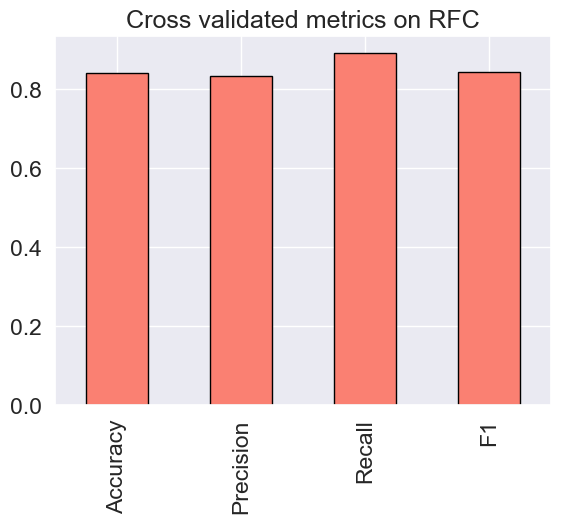

In [118]:
# Visualize the cross validated metrics

cv_metrics_random_forest = pd.DataFrame({"Accuracy" : cv_acc_random_forest,
                                        "Precision" : cv_precision_random_forest,
                                        "Recall" : cv_recall_random_forest,
                                        "F1" : cv_f1_random_forest},
                                       index=[0])
cv_metrics_random_forest.T.plot.bar(title="Cross validated metrics on RFC",
                                   legend=False, color="salmon", edgecolor="black");

print(f"Accuracy score : {(cv_acc_random_forest) * 100:.2f}%")
print(f"Precision score : {(cv_precision_random_forest) * 100:.2f}%")
print(f"Recall score : {(cv_recall_random_forest) * 100:.2f}%")
print(f"F1 score : {(cv_f1_random_forest) * 100:.2f}%")

In [101]:
# GridSearch CV on GradientBoostClassifier : 

gradient_boost_grid = {"n_estimators" : np.arange(10, 50, 10),
          "max_depth" : range(1, 16, 2),
          "learning_rate" : np.arange(0.1, 1, 0.1),
          "random_state": np.arange(0, 10, 1)}

gradient_boost_grid_search = GridSearchCV(GradientBoostingClassifier(),
                                         param_grid=gradient_boost_grid,
                                         cv=5,
                                         verbose=True)


gradient_boost_grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(1, 16, 2),
                         'n_estimators': array([10, 20, 30, 40]),
                         'random_state': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
             verbose=True)

In [102]:
gradient_boost_grid_search.best_params_

{'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 10, 'random_state': 0}

### Feature Importance

Feature importnace is another way of asking which features contributed to the outcomes of the model and 
how did they contribute ?

In [103]:
gradient_boost_grid_search.score(X_test, Y_test)

0.8688524590163934

In [105]:
# Instantiating Gradient Boost Classifier with its best parameters

grad_boost_classifier = GradientBoostingClassifier(learning_rate=0.5, 
                                                   max_depth=1,
                                                   n_estimators=10,
                                                   random_state=0)


In [106]:
# cross validated accuracy
cv_acc_grad_boost = cross_val_score(grad_boost_classifier,
                                      X,
                                      Y,
                                      cv=5,
                                      scoring="accuracy")
cv_acc_grad_boost = np.mean(cv_acc_grad_boost)
cv_acc_grad_boost

0.8413114754098361

In [107]:
# cross validated precision

cv_precision_grad_boost = cross_val_score(grad_boost_classifier,
                                      X,
                                      Y,
                                      cv=5,
                                      scoring="precision")
cv_precision_grad_boost = np.mean(cv_precision_grad_boost)
cv_precision_grad_boost

0.8290208449960772

In [108]:
# cross validated recall

cv_recall_grad_boost = cross_val_score(grad_boost_classifier,
                                      X,
                                      Y,
                                      cv=5,
                                      scoring="recall")
cv_recall_grad_boost = np.mean(cv_recall_grad_boost)
cv_recall_grad_boost


0.8969696969696971

In [109]:
# cross validated F1 score

cv_f1_grad_boost = cross_val_score(grad_boost_classifier,
                                      X,
                                      Y,
                                      cv=5,
                                      scoring="f1")
cv_f1_grad_boost = np.mean(cv_f1_grad_boost)
cv_f1_grad_boost


0.8607824838549838

Accuracy score : 84.13%
Precision score : 82.90%
Recall score : 89.70%
F1 score : 86.08%


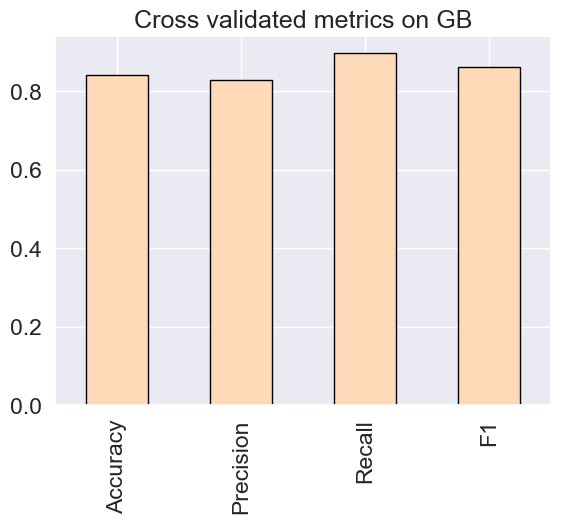

In [119]:
# visualize the cross validated metrics

cv_metrics_grad_boost = pd.DataFrame({"Accuracy" : cv_acc_grad_boost,
                                     "Precision" : cv_precision_grad_boost,
                                     "Recall" : cv_recall_grad_boost,
                                     "F1" : cv_f1_grad_boost},
                                    index=[0])
cv_metrics_grad_boost.T.plot.bar(title="Cross validated metrics on GB",
                                legend=False, color="peachpuff", edgecolor="black");

print(f"Accuracy score : {(cv_acc_grad_boost) * 100:.2f}%")
print(f"Precision score : {(cv_precision_grad_boost) * 100:.2f}%")
print(f"Recall score : {(cv_recall_grad_boost) * 100:.2f}%")
print(f"F1 score : {(cv_f1_grad_boost) * 100:.2f}%")
      

In [82]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Feature importance of Logistic Regression
* MODEL NAME _ FEATURE IMPORTANCE

In [83]:
# Fit an instance of logistic Regression

In [122]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [123]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')
clf.fit(X_train, Y_train);

In [124]:
#check coef
clf.coef_

array([[ 0.00316728, -0.86044681,  0.66067028, -0.01156993, -0.00166374,
         0.04386098,  0.31275871,  0.02459362, -0.60413098, -0.56862784,
         0.45051633, -0.63609911, -0.67663374]])

In [125]:
len(clf.coef_)

1

In [126]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.0031672836648050503,
 'sex': -0.8604468104930325,
 'cp': 0.6606702797887507,
 'trestbps': -0.01156993266606034,
 'chol': -0.0016637447948541165,
 'fbs': 0.043860983413115645,
 'restecg': 0.31275871271392713,
 'thalach': 0.024593615341531826,
 'exang': -0.6041309838702352,
 'oldpeak': -0.5686278420079321,
 'slope': 0.45051633355228077,
 'ca': -0.6360991091618156,
 'thal': -0.6766337375624075}

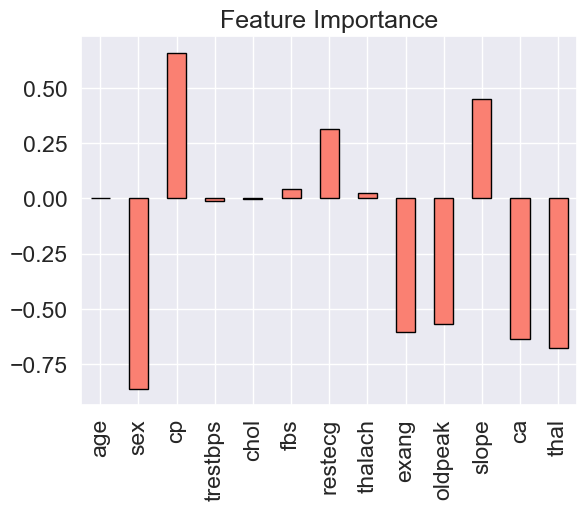

In [127]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False, color='salmon', edgecolor="black");

In [90]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [91]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [92]:
pd.crosstab(df["restecg"], df["target"])

target,0,1
restecg,,
0,79,68
1,56,96
2,3,1


In [107]:
from sklearn.ensemble import GradientBoostingClassifier

# 
np.random.seed(42)

#
clf123 = GradientBoostingClassifier(n_estimators=10,
                                   learning_rate=0.5,
                                   max_depth=1, random_state=0)

# 
clf123.fit(X_train, Y_train)

# Scores
clf123_score = clf123.score(X_test, Y_test)

clf123_score


0.8688524590163934

In [95]:
X_test


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [96]:
Y_train


132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [97]:
Y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64